[5.294340258721678, 5.254703647575505, 5.655455865313781, 5.752635202276796, 5.600418155784714]


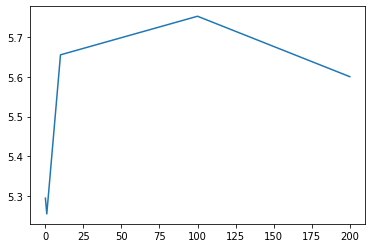

In [69]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold 
from statistics import mean
import pandas as pd
import matplotlib.pyplot as plt

lambdas = [0.1,1,10,100,200]
folds = 10

df = pd.read_csv("train.csv")

kf = KFold(n_splits=folds,random_state=None, shuffle=True)
#print(kf)

y = df.iloc[:,0]
X = df.iloc[:,1:]
#print(df)

main_mses = []
for lam in lambdas:
    sub_mses = []
    for train_index, test_index in kf.split(df):
        #print(train_index, "\n", test_index, "\n")
        X_train, X_test = df.iloc[train_index,1:], df.iloc[test_index,1:]
        #print(X_test)
        #print(X_train)
        y_train, y_test = df.iloc[train_index,0], df.iloc[test_index,0]
        #print(y_test)
        #print(y_train)
        clf = Ridge(alpha=lam).fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        sub_mses.append(mean_squared_error(y_test, y_pred)**(1/2))
        #print(sub_mses)
    main_mses.append(mean(sub_mses))
print(main_mses)

plt.plot(lambdas,main_mses)
plt.show()

df = pd.DataFrame(main_mses)  
    
# saving the dataframe  
df.to_csv('output.csv', index=False)  
